<a href="https://colab.research.google.com/github/dearmouries/ERC875-Example-Implementation/blob/master/Recognising_handwritten_digits_using_a_NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Neural networks in recognising handwritten digits


## Introduction

This Colab notebook shows how to set up and train a **Neural Network (NN)** model for *categorical classification*, which is to classify (or identify) grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).


### The dataset

The dataset has been around almost as long as the field itself ([more background on the data](http://www.pymvpa.org/datadb/mnist.html)). The dataset has 60,000 training images, plus 10,000 test images, assembled by the National Institure of Standards and Technology (the NIST in MNIST) in the 1980s. You
can see some MNIST sample digits in figure 2.1 of the textbook *Deep Learning with Python, Second Edition* by François Chollet.

## Technical preliminaries

First, let's get some technical preliminaries out of the way. We will first import the following packages and set the seed for the random number generator.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

When we train models, randomness enters the process in a few different places.
*   Starting values for the weights (the optimizer will try to improve these weights).
*   The order in which we process the batches during the training.

We next set the seed for the random number generator so that the
results will be the same every time the notebook is run. 🤞



In [2]:
keras.utils.set_random_seed(42)

## Read in the data

With the technical preliminaries out of the way, let's load the dataset and take a look.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

There are 60,000 images in the training set, each of which is a 28x28 matrix.

In [5]:
test_images.shape

(10000, 28, 28)

The remaining 10,000 images are in the test set.

<br>

OK, let's look at the first 10 rows of the dependent variable $y$.





In [6]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Data Preprocessing

Before training, let's preprocess the data.

**Tip**: NNs learn best when each independent variable is in a small range. So, standardize them by either
- subtracting the mean and dividing by the standard deviation or
- if they are in a guaranteed range, just divide by the max value.

Previously, our training images were stored in an array of shape (60000, 28, 28) with values in the [0, 255] interval. Since the inputs here range from 0 to 255, let's normalize to the 0-1 range by dividing everything by 255.

In [7]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## Define the model

Creating an NN model is usually just a few lines of Keras code.

* The input will be 28 x 28 matrices of numbers. These will have to be *flattened* into a loooong vector and then fed to the next layer.
* We will start with a single hidden layer.
* Since this is a *multi-class classification problem* (e.g., we need to predict one of 10 numbers categories), the output layer has to produce a 10-element vector of probabilities that sum up to 1.0  => we will use the *softmax* layer.

In [8]:
# define the input layer
input = keras.Input(shape=(28,28))

# convert the 28 x 28 matrix of numbers into a long vector
h = keras.layers.Flatten()(input)

# feed the long vector to the hidden layer
h = keras.layers.Dense(512, activation="relu", name="Hidden")(h)

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(10, activation="softmax", name="Output")(h)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

The `model.summary()` command is a good way to get a quick overview of what you have defined.

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 512)               401920    
                                                                 
 Output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We can "visualize" the network graphically as well using Keras' `plot_model` function.

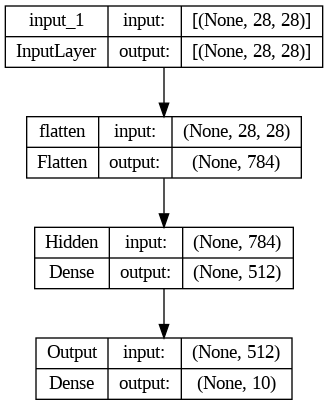

In [10]:
keras.utils.plot_model(model, show_shapes=True)

Let's hand-calculate the number of parameters to verify.

In [11]:
(784 * 512 + 512) + (512 * 10 + 10)

407050

### Set optimization parameters

Now that the model is defined, we need to tell Keras three things:

*   Which **optimizer** to use - the mechanism in which the model's weights are updated (based on the training data).
*   What **loss function** to use - how to measure performance on the training data to steer the model's weights updates in the right direction.
*   What **metrics** you want Keras to report out - in classification problems like this one, Accuracy is usually the metric you want to see.

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Train the model

To kickoff training, we have to decide on two things:
* The *batch size* - let's start the training by using 128
* The number of *epochs* i.e., how many passes through the training data - let's start the training by using 5.

OK, let's train the model using the `model.fit` function!

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2645 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9890


## Evaluate the model

Now that we have a trained model, we can use it to predict class probabilities for new, never-seen-before digits — images that weren’t part of the training data, like those from the test set.

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 86ms/step


array([8.9771056e-08, 1.3389318e-08, 2.3755149e-05, 1.0072256e-04,
       5.9648134e-11, 4.9355890e-08, 4.6213634e-11, 9.9987257e-01,
       3.8757636e-07, 2.5064760e-06], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image `test_digits[0]` belongs to class i. The first test digit has the highest probability score (0.99..., almost 1) at index 7, so according to our model, it must be a 7. Let's see what this digit image looks like.

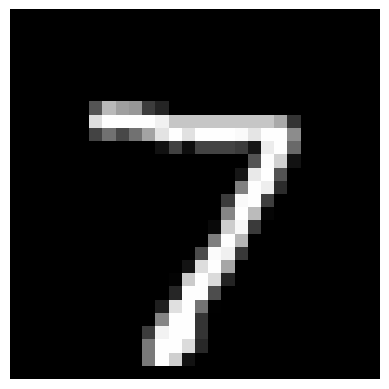

In [22]:
# Display the first test digit image
plt.imshow(test_images[0], cmap='gray') # Use cmap='gray' for grayscale images, omit for color images
plt.axis('off') # Optional: Removes the axis and ticks around the image
plt.show()

It is good to know that our model identified the first test digit image well. Overall, how good is our model on classifying (or identifying) such never-seen-before handwritten digits? We evaluate our **model's accuracy on the entire test set**.

`model.evaluate` is a handy function to calculate the performance of your model on any dataset.

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9780
test_acc: 0.9779999852180481


Our model achieves a *97.8%* accuracy on the entire test set.

## Visualising the model's output

> **Practical Tip**: Once any model is built, it is a good idea to look at the predictions on the test set and see what types of examples the model has difficulty predicting. That can often suggest ways in which the model can be improved.

For problems where the input data consists of *images*, **visualisation** can be very helpful.


In [24]:
# get the predictions
test_hat = np.argmax(model.predict(test_images), axis=1)

# collect examples where the model made a mistake
misses = np.where(test_hat != test_labels)

313/313 [==============================] - 0s 2ms/step


Plot a random sample of 25 test images incorrectly classified by the model,
their predicted labels and ground truth (in parentheses).

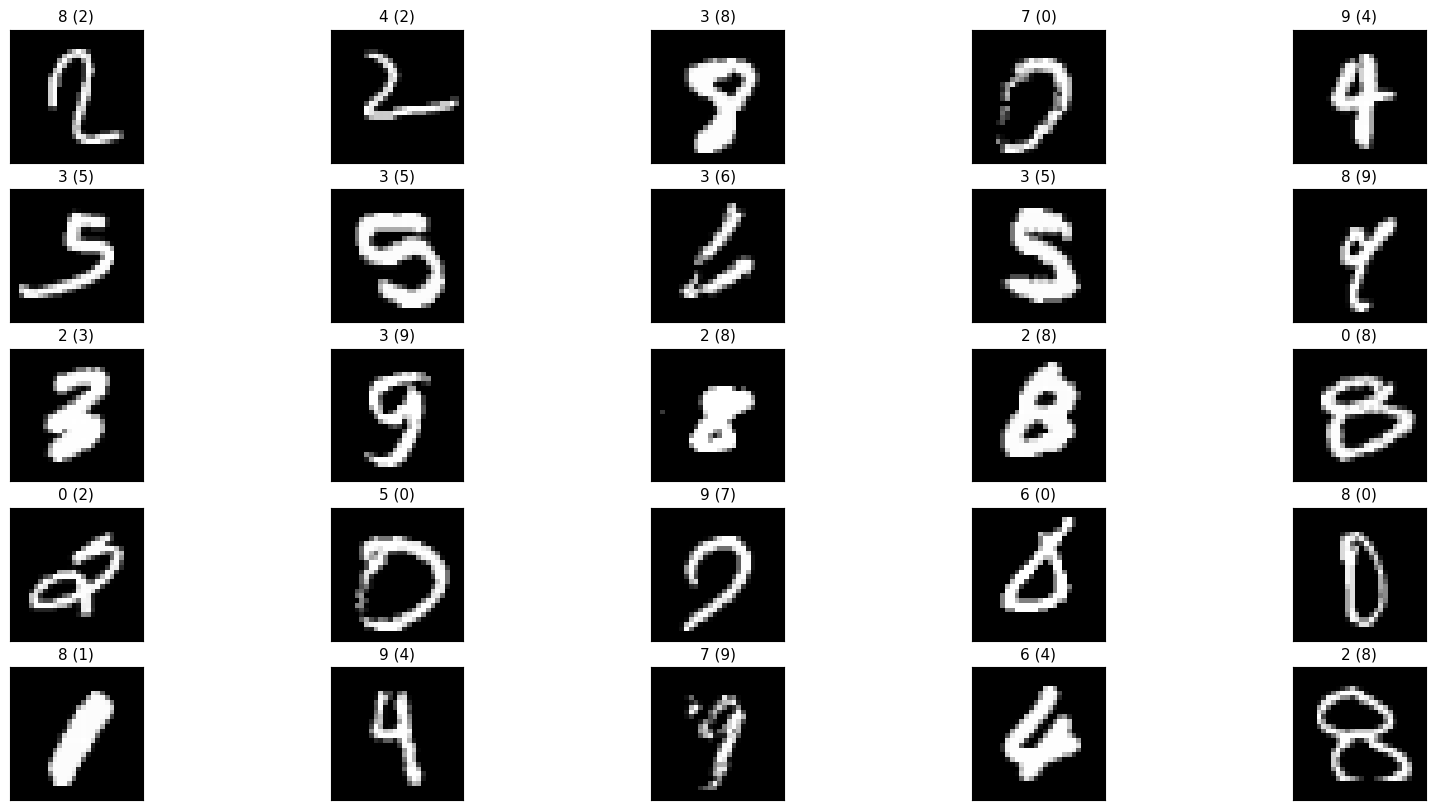

In [25]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Plot a random sample of 25 test images incorrectly classified by the model,
# their predicted labels and ground truth
figure = plt.figure(figsize=(20, 10))
for i, index in enumerate(np.random.choice(misses[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]), cmap="gray")
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[test_hat[index]],
                                  labels[test_labels[index]]), fontsize = 11)

You can see that the model seems to be having difficulty distinguishing between *visually similar* categories.

The **confusion matrix** is a good way to get a complete picture of this phenomenon. Let's generate **confusion matrix** in numerical and percentage formats.

In [26]:
actuals = [labels[i] for i in test_labels]
predictions = [labels[i] for i in test_hat]

In [27]:
df = pd.DataFrame({'Predictions': predictions, 'Actuals': actuals})
pd.crosstab(df.Predictions, df.Actuals)

Actuals,0,1,2,3,4,5,6,7,8,9
Predictions,,,,,,,,,,
0,964,0,1,0,2,2,2,1,1,1
1,0,1119,2,0,0,1,3,3,0,2
2,3,3,1013,5,2,0,1,13,7,0
3,0,1,3,993,1,13,1,1,8,7
4,1,0,2,0,957,1,6,1,4,9
5,1,0,0,3,0,862,3,0,1,1
6,3,2,1,0,3,3,940,0,1,0
7,1,1,4,2,2,2,0,999,2,2
8,4,9,5,3,1,5,2,1,948,2


In [28]:
(pd.crosstab(df.Predictions, df.Actuals, normalize = 'columns') * 100).round(2)

Actuals,0,1,2,3,4,5,6,7,8,9
Predictions,,,,,,,,,,
0,98.37,0.00,0.10,0.00,0.20,0.22,0.21,0.10,0.10,0.10
1,0.00,98.59,0.19,0.00,0.00,0.11,0.31,0.29,0.00,0.20
2,0.31,0.26,98.16,0.50,0.20,0.00,0.10,1.26,0.72,0.00
3,0.00,0.09,0.29,98.32,0.10,1.46,0.10,0.10,0.82,0.69
4,0.10,0.00,0.19,0.00,97.45,0.11,0.63,0.10,0.41,0.89
5,0.10,0.00,0.00,0.30,0.00,96.64,0.31,0.00,0.10,0.10
6,0.31,0.18,0.10,0.00,0.31,0.34,98.12,0.00,0.10,0.00
7,0.10,0.09,0.39,0.20,0.20,0.22,0.00,97.18,0.21,0.20
8,0.41,0.79,0.48,0.30,0.10,0.56,0.21,0.10,97.33,0.20


**Observations**

*   All the off-diagonal numbers represent mistakes made by the model.
*   You can see that the model made the most mistakes for identifying (i) **4 as 9**, (ii) **5 as 3**, and (iii) **7 as 2**. This is understandable since the handwritten digits of these numbers could be looked similar as shown in the figure above.

## Conclusion

We have built a **Neural Network (NN)** model that can classify grayscale handwritten digits with almost **98% accuracy**!

## Credits

This notebook was inspired by the MIT Sloan Hands-on Deep Learning (Spring 2023) course and also *Deep Learning with Python, Second Edition* by François Chollet.